# Scikit-learn(https://scikit-learn.org/stable/)
---

- imple and efficient tools for predictive data analysis
- Accessible to everybody, and reusable in various contexts
- Built on NumPy, SciPy, and matplotlib
- Open source, commercially usable - BSD license

## Example dataset: 
---
Optical recognition of handwritten digits dataset

The original is MNIST and provides 8 by 8 images from scikit-learn, and features are integer values from 0 to 16.

MNIST가 원본이며 scikit-learn 에서 8 by 8 image를 제공하고 있으며, features는 0에서 16까지 정수값이다.

![digits](https://scikit-learn.org/stable/_images/sphx_glr_plot_lle_digits_thumb.png)

## load datasets
---
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets

In [10]:
import matplotlib.pyplot as plt
from sklearn import datasets

digits = datasets.load_digits()

X = digits.data
Y = digits.target

In [43]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [42]:
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

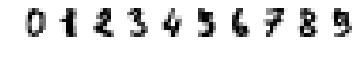

In [41]:
_, axes = plt.subplots(1, 10)
for i in range(10):
    axes[i].set_axis_off()
    axes[i].imshow(digits.images[i], cmap=plt.cm.gray_r, interpolation='nearest')

## Train/Test Split

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split

X_tr, X_ts, Y_tr, Y_ts = train_test_split(X, Y, test_size=0.3)

print(X_tr.shape, Y_tr.shape)
print(X_ts.shape, Y_ts.shape)

(1257, 64) (1257,)
(540, 64) (540,)


## Ensemble method
---
1. sklearn.ensemble.BaggingClassifier
2. sklearn.ensemble.AdaBoostClassifier
3. sklearn.ensemble.GradientBoostingClassifier
4. sklearn.ensemble.StackingClassifier

### 1. Bagging
---
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier
```python
class sklearn.ensemble.BaggingClassifier(base_estimator=None, n_estimators=10, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=None, random_state=None, verbose=0)
```

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier

knn = KNeighborsClassifier()
clf = BaggingClassifier(base_estimator=knn, n_estimators=10, random_state=123)
clf.fit(X_tr, Y_tr)
clf.score(X_ts, Y_ts)

0.9851851851851852

In [46]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_tr, Y_tr)
clf.score(X_ts, Y_ts)

0.9444444444444444

In [47]:
clf.decision_path

<bound method BaseForest.decision_path of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)>

### 2. AdaBoost
---
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier
```python
class sklearn.ensemble.AdaBoostClassifier(base_estimator=None, n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=None)
```

The most important parameters are base_estimator, n_estimators, and learning_rate


In [55]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=50, learning_rate=0.05, random_state=123)
clf.fit(X_tr, Y_tr)
clf.score(X_ts, Y_ts)

0.6537037037037037

In [56]:
from sklearn.metrics import confusion_matrix

pred = clf.predict(X_ts)
confusion = confusion_matrix(Y_ts, pred)
confusion

array([[39,  0,  0,  0,  8,  0,  1,  0,  1,  0],
       [ 0, 18,  0,  1,  5,  0,  0,  0, 31,  1],
       [ 0,  3, 15,  3,  0,  0,  0,  0, 36,  0],
       [ 0,  0,  1, 47,  0,  2,  0,  0, 10,  3],
       [ 0,  1,  0,  0, 47,  0,  2,  1,  2,  0],
       [ 0, 17,  1,  0,  5, 27,  0,  0,  2,  6],
       [ 0,  6,  0,  0,  3,  0, 45,  0,  1,  0],
       [ 0,  0,  0,  0,  3,  0,  0, 33, 13,  0],
       [ 0,  1,  0,  0,  1,  0,  0,  0, 47,  0],
       [ 0,  3,  0,  4,  1,  0,  0,  0,  8, 35]], dtype=int64)

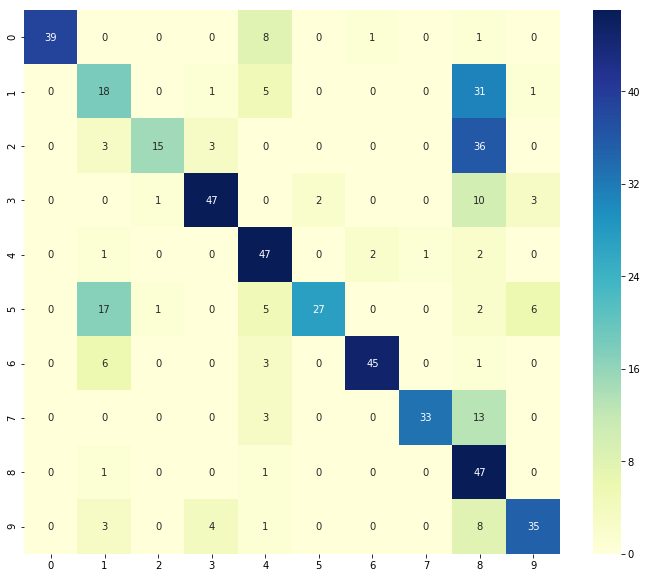

In [57]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

confusion = confusion_matrix(Y_ts, pred)
ticks = np.arange(0.5, 10.5, 1)
plt.figure(figsize=(12, 10))
sns.heatmap(confusion, annot=True, fmt="d", cmap="YlGnBu")
plt.xticks(ticks, ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], size=10)
plt.yticks(ticks, ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], size=10)
plt.show()

In [58]:
from sklearn.svm import SVC
clf = AdaBoostClassifier(base_estimator=SVC(probability=True, gamma='auto'), n_estimators=50, random_state=123)
clf.fit(X_tr, Y_tr)
clf.score(X_ts, Y_ts)

0.5962962962962963

### 3. GradientBoosting
---
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
```python 
class sklearn.ensemble.GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, presort='deprecated', validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
```

In [59]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=50, random_state=123)
clf.fit(X_tr, Y_tr)
clf.score(X_ts, Y_ts)

0.9351851851851852

### 4. Stacking
---
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html#sklearn.ensemble.StackingClassifier
```python 
class sklearn.ensemble.StackingClassifier(estimators, final_estimator=None, cv=None, stack_method='auto', n_jobs=None, passthrough=False, verbose=0)
```

scikit-learn 0.22 version upgrade
```
pip install -U scikit-learn
```

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

#make pipeline
estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=123)),
    ('svc', SVC(random_state=123)),
    ('knn', KNeighborsClassifier(random_state=123))
    ]
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

clf.fit(X_tr, Y_tr)
clf.score(X_ts, Y_ts)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9907407407407407

In [12]:
clf.get_params

<bound method _BaseHeterogeneousEnsemble.get_params of StackingClassifier(cv=None,
                   estimators=[('rf',
                                RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min

In [15]:
clf.predict(X_ts)

array([0, 2, 1, 1, 0, 0, 1, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 1, 0, 1, 2, 1,
       0, 2, 1, 2, 2, 2, 2, 0, 0, 1, 1, 2, 1, 0, 2, 1, 2, 0, 2, 1, 2, 1,
       1])

### google colab을 이용시 scikit-learn의 버전이 0.22보다 낮으므로 mlxtend(machine learning extensions) 모듈을 이용

```python
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from mlxtend.classifier import StackingClassifier

#make estimators
knn = KNeighborsClassifier()

estimators = [RandomForestClassifier(n_estimators=10, random_state=123), SVC(gamma='auto', random_state=123), knn]
clf = StackingClassifier(classifiers=estimators, meta_classifier=LogisticRegression())

clf.fit(X_tr, Y_tr)
clf.score(X_ts, Y_ts)
```